<a href="https://colab.research.google.com/github/saadkhalidabbasi/EDA-Projects/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing DataSet
df=pd.read_csv("student_performance.csv")

In [3]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [4]:
df.tail()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [5]:
df.shape

(10, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


In [9]:
df.head()

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,John,Male,85,15,78,1,High,80
1,Sarah,Female,90,20,85,2,Medium,87
2,Alex,Male,78,10,65,0,Low,68
3,Michael,Male,92,25,90,3,High,92
4,Emma,Female,88,18,82,2,Medium,85


In [10]:
df.isnull().sum()

,0
Name,0
Gender,0
AttendanceRate,0
StudyHoursPerWeek,0
PreviousGrade,0
ExtracurricularActivities,0
ParentalSupport,0
FinalGrade,0


In [13]:
df.drop_duplicates(inplace=True)

In [15]:
df.describe()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,85.600000,17.700000,78.100000,1.500000,80.200000
std,7.441625,6.848357,10.170218,1.080123,10.097304
min,70.000000,8.000000,60.000000,0.000000,62.000000
25%,82.750000,12.750000,71.750000,1.000000,73.500000
50%,86.500000,17.500000,80.000000,1.500000,82.500000
75%,90.750000,21.500000,85.750000,2.000000,87.750000
max,95.000000,30.000000,90.000000,3.000000,92.000000


In [17]:
df.columns

Index(['Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [18]:
df['FinalGrade'].unique()

array([80, 87, 68, 92, 85, 90, 62, 78, 72, 88])

In [19]:
df['FinalGrade'].mean()

80.2

## **Visualizing Our DataSet**

In [25]:
# Distribution of Final Grades Across Gender using pie graph
fig = px.pie(df, names='Gender', title='Distribution of Final Grades Across Gender')
fig.show()

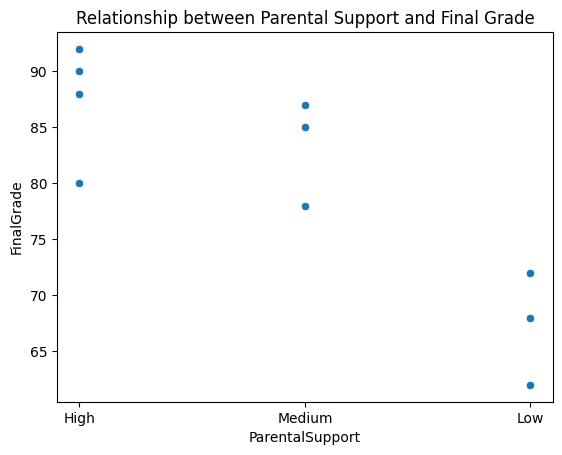

In [28]:
# Relationship between parental support and Final Grade
sns.scatterplot(x='ParentalSupport', y='FinalGrade', data=df)
plt.title('Relationship between Parental Support and Final Grade')
plt.show()

In [30]:
fig=px.bar(df, x='StudyHoursPerWeek', y='FinalGrade', color='StudyHoursPerWeek', title='Relationship between Study Time and Final Grade')
fig.show()

<Axes: xlabel='StudyHoursPerWeek', ylabel='FinalGrade'>

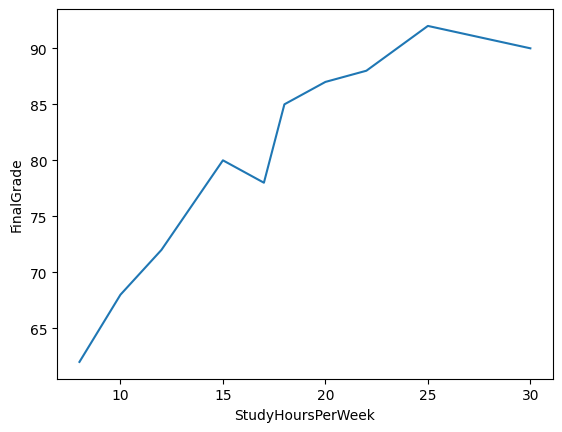

In [31]:
sns.lineplot(x='StudyHoursPerWeek',y="FinalGrade",data=df)

<Axes: xlabel='AttendanceRate', ylabel='FinalGrade'>

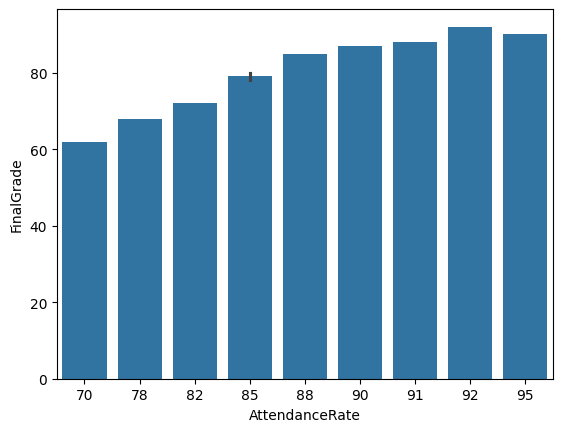

In [34]:
sns.barplot(data=df,x="AttendanceRate",y="FinalGrade")

In [39]:
# Checking Correlation, excluding non-numeric columns
df.select_dtypes(include=['number']).corr()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
AttendanceRate,1.000000,0.934885,0.973946,0.691172,0.974177
StudyHoursPerWeek,0.934885,1.000000,0.930535,0.563286,0.926489
PreviousGrade,0.973946,0.930535,1.000000,0.743432,0.998457
ExtracurricularActivities,0.691172,0.563286,0.743432,1.000000,0.743706
FinalGrade,0.974177,0.926489,0.998457,0.743706,1.000000


In [42]:
# Previous Grade Vs Attendance Rate using plotly
fig = px.scatter(df, x='PreviousGrade', y='AttendanceRate', color='PreviousGrade', title='Previous Grade vs Attendance Rate')
fig.show()

In [50]:
# ExtraCurriculam Activities Vs StudyHourPerWeek
fig=px.bar(df, x='ExtracurricularActivities', y='StudyHoursPerWeek',color="Gender" ,title='ExtraCurricular Activities vs Study Hours Per Week')
fig.show()

<Axes: xlabel='Gender', ylabel='StudyHoursPerWeek'>

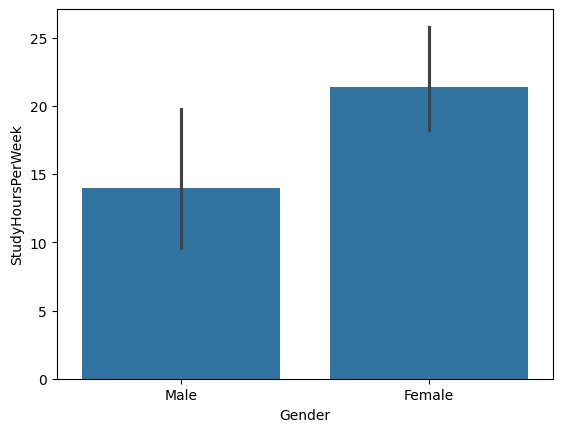

In [52]:
# Gender Vs Study Hour
sns.barplot(data=df,x="Gender",y="StudyHoursPerWeek")